In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv('income.csv')

In [6]:
df.head()

,Name,Age,Income
0,Anu,27,70000
1,seema,29,90000
2,suresh,29,61000
3,kamal,28,60000
4,poonam,42,150000


In [7]:
def minmax(x):
    xs = (x - x.min())/(x.max() - x.min()) 
    return xs

In [8]:
df_new=minmax(df.iloc[:,1:])

In [9]:
df_new.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


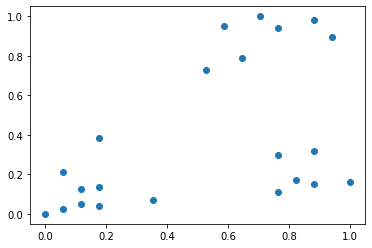

In [10]:
plt.scatter(df_new['Age'],df_new['Income'])
plt.show()

In [11]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new[["Age","Income"]])
    sse.append(km.inertia_)

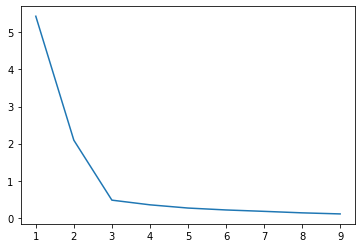

In [12]:
plt.plot(k_range,sse)
plt.show()

In [13]:
km=KMeans(n_clusters=3)

In [14]:
Y_predict=km.fit_predict(df_new[["Age","Income"]])

In [15]:
df['cluster']=Y_predict

In [16]:
df.head()

,Name,Age,Income,cluster
0,Anu,27,70000,1
1,seema,29,90000,1
2,suresh,29,61000,1
3,kamal,28,60000,1
4,poonam,42,150000,2


In [17]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

In [18]:
df0.head()

,Name,Age,Income,cluster
16,sohan,40,65000,0
17,rohan,41,63000,0
18,mohan,43,64000,0
19,binu,39,80000,0
20,deepa,41,82000,0


In [19]:
df1.head()

,Name,Age,Income,cluster
0,Anu,27,70000,1
1,seema,29,90000,1
2,suresh,29,61000,1
3,kamal,28,60000,1
11,deepa,26,45000,1


In [20]:
df2.head()

,Name,Age,Income,cluster
4,poonam,42,150000,2
5,geeta,39,155000,2
6,tina,41,160000,2
7,rekha,38,162000,2
8,ravi,36,156000,2


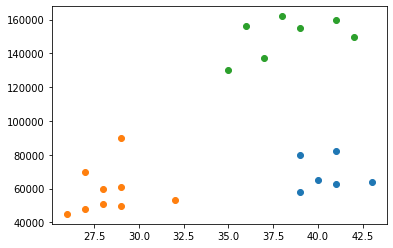

In [21]:
plt.scatter(df0['Age'],df0['Income'])
plt.scatter(df1['Age'],df1['Income'])
plt.scatter(df2['Age'],df2['Income'])
plt.show()

In [22]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [23]:
km.cluster_centers_[:,0]

array([0.85294118, 0.1372549 , 0.72268908])

In [24]:
km.cluster_centers_[:,1]

array([0.2022792 , 0.11633428, 0.8974359 ])

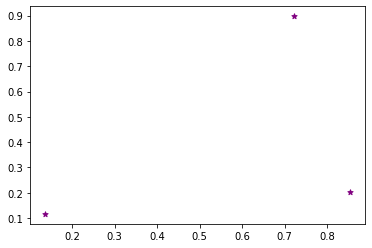

In [25]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=30)
plt.show()